In [2]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#import the 3 datasets

movie_data = pd.read_csv("movies.dat",
                       sep="::", header=None, names=['MovieID','Title','Genres'], 
                       dtype={'MovieID': np.int32, 'Title': np.str, 'Genres': np.str}, engine='python')
users_data = pd.read_csv("users.dat",
                       sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], 
    dtype={'UserID': np.int32, 'Gender': np.str, 'Age': np.int32, 'Occupation' : np.int32, 'Zip-code' : np.str}, engine='python')
ratings_data = pd.read_csv("ratings.dat",
                       sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], 
                dtype={'UserID': np.int32, 'MovieID': np.int32, 'Rating': np.int32, 'Timestamp' : np.str}, engine='python')



In [4]:
#merging tables into one

movie_ratings=pd.merge(movie_data,ratings_data,on='MovieID')
movie_ratings_users=pd.merge(movie_ratings,users_data, on='UserID')

Master_Data=movie_ratings_users.drop(['Zip-code','Timestamp'],axis=1)
print(Master_Data.head())


   MovieID                                      Title  \
0        1                           Toy Story (1995)   
1       48                          Pocahontas (1995)   
2      150                           Apollo 13 (1995)   
3      260  Star Wars: Episode IV - A New Hope (1977)   
4      527                    Schindler's List (1993)   

                                 Genres  UserID  Rating Gender  Age  \
0           Animation|Children's|Comedy       1       5      F    1   
1  Animation|Children's|Musical|Romance       1       5      F    1   
2                                 Drama       1       5      F    1   
3       Action|Adventure|Fantasy|Sci-Fi       1       4      F    1   
4                             Drama|War       1       5      F    1   

   Occupation  
0          10  
1          10  
2          10  
3          10  
4          10  


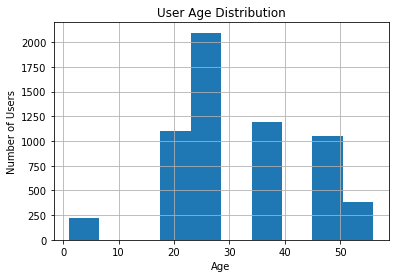

In [5]:
%matplotlib inline
#plotting user age distribution
users_data.Age.hist()
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('User Age Distribution')
plt.show()


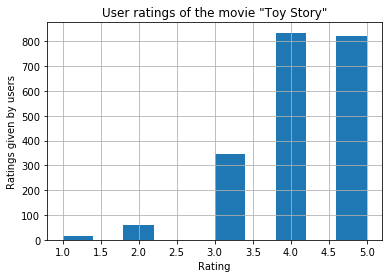

In [6]:
#User rating of the movie "Toy Story"

movies_grouped=Master_Data.groupby('Title')
toy_story=movies_grouped.get_group('Toy Story (1995)')
toy_story['Rating'].hist()
plt.xlabel('Rating')
plt.ylabel('Ratings given by users')
plt.title('User ratings of the movie "Toy Story"')
plt.show()


In [7]:
#Top 25 movies by viewership rating

rating_avg = Master_Data.groupby('Title')['Rating'].mean()
rating_avg = rating_avg.sort_values(ascending=False)
rating_count = Master_Data.groupby('Title')['Rating']
rating_count = rating_count.count().sort_values(ascending=False)
rating_avg_count = pd.DataFrame(data=rating_avg)
rating_avg_count['number_of_ratings'] = pd.DataFrame(rating_count)
print(rating_avg_count[:25])


                                                      Rating  \
Title                                                          
Gate of Heavenly Peace, The (1995)                  5.000000   
Lured (1947)                                        5.000000   
Ulysses (Ulisse) (1954)                             5.000000   
Smashing Time (1967)                                5.000000   
Follow the Bitch (1998)                             5.000000   
Song of Freedom (1936)                              5.000000   
Bittersweet Motel (2000)                            5.000000   
Baby, The (1973)                                    5.000000   
One Little Indian (1973)                            5.000000   
Schlafes Bruder (Brother of Sleep) (1995)           5.000000   
I Am Cuba (Soy Cuba/Ya Kuba) (1964)                 4.800000   
Lamerica (1994)                                     4.750000   
Apple, The (Sib) (1998)                             4.666667   
Sanjuro (1962)                          

In [8]:
#the ratings for all the movies reviewed by for a particular user of user id = 2696

user_2696 = Master_Data[Master_Data['UserID'] == 2696]
print(user_2696)

        MovieID                                           Title  \
991035      350                              Client, The (1994)   
991036      800                                Lone Star (1996)   
991037     1092                           Basic Instinct (1992)   
991038     1097               E.T. the Extra-Terrestrial (1982)   
991039     1258                             Shining, The (1980)   
991040     1270                       Back to the Future (1985)   
991041     1589                                 Cop Land (1997)   
991042     1617                        L.A. Confidential (1997)   
991043     1625                                Game, The (1997)   
991044     1644          I Know What You Did Last Summer (1997)   
991045     1645                    Devil's Advocate, The (1997)   
991046     1711  Midnight in the Garden of Good and Evil (1997)   
991047     1783                                 Palmetto (1998)   
991048     1805                              Wild Things (1998

In [9]:
#unique genres

print(movie_data['Genres'].unique())

["Animation|Children's|Comedy" "Adventure|Children's|Fantasy"
 'Comedy|Romance' 'Comedy|Drama' 'Comedy' 'Action|Crime|Thriller'
 "Adventure|Children's" 'Action' 'Action|Adventure|Thriller'
 'Comedy|Drama|Romance' 'Comedy|Horror' "Animation|Children's" 'Drama'
 'Action|Adventure|Romance' 'Drama|Thriller' 'Drama|Romance' 'Thriller'
 'Action|Comedy|Drama' 'Crime|Drama|Thriller' 'Drama|Sci-Fi' 'Romance'
 'Adventure|Sci-Fi' 'Adventure|Romance' "Children's|Comedy|Drama"
 'Documentary' 'Drama|War' 'Action|Crime|Drama' 'Action|Adventure'
 'Crime|Thriller' "Animation|Children's|Musical|Romance"
 'Action|Drama|Thriller' "Children's|Comedy" 'Drama|Mystery'
 'Sci-Fi|Thriller' 'Action|Comedy|Crime|Horror|Thriller' 'Drama|Musical'
 'Crime|Drama|Romance' 'Adventure|Drama' 'Action|Thriller'
 "Adventure|Children's|Comedy|Musical" 'Action|Drama|War'
 'Action|Adventure|Crime' 'Crime' 'Drama|Mystery|Romance' 'Action|Drama'
 'Drama|Romance|War' 'Horror' 'Action|Adventure|Comedy|Crime' 'Comedy|War'
 'Action

In [10]:
#One hot Encoding(Genre)

Genre = Master_Data['Genres']
Genre = Genre.str.get_dummies().add_prefix('Genres_')
genre_ohe = pd.concat( [Master_Data.drop(['Genres'],axis=1),Genre],axis=1,join_axes=[Master_Data.index])

In [11]:
genre_ohe = pd.get_dummies(
    genre_ohe,
    columns=['Gender']
)

In [12]:
print(genre_ohe.head())

   MovieID                                      Title  UserID  Rating  Age  \
0        1                           Toy Story (1995)       1       5    1   
1       48                          Pocahontas (1995)       1       5    1   
2      150                           Apollo 13 (1995)       1       5    1   
3      260  Star Wars: Episode IV - A New Hope (1977)       1       4    1   
4      527                    Schindler's List (1993)       1       5    1   

   Occupation  Genres_Action  Genres_Adventure  Genres_Animation  \
0          10              0                 0                 1   
1          10              0                 0                 1   
2          10              0                 0                 0   
3          10              1                 1                 0   
4          10              0                 0                 0   

   Genres_Children's  ...  Genres_Horror  Genres_Musical  Genres_Mystery  \
0                  1  ...              0      

In [13]:
#features affecting the ratings of any particular movie

print(genre_ohe.dtypes)

MovieID                int32
Title                 object
UserID                 int32
Rating                 int32
Age                    int32
Occupation             int32
Genres_Action          int64
Genres_Adventure       int64
Genres_Animation       int64
Genres_Children's      int64
Genres_Comedy          int64
Genres_Crime           int64
Genres_Documentary     int64
Genres_Drama           int64
Genres_Fantasy         int64
Genres_Film-Noir       int64
Genres_Horror          int64
Genres_Musical         int64
Genres_Mystery         int64
Genres_Romance         int64
Genres_Sci-Fi          int64
Genres_Thriller        int64
Genres_War             int64
Genres_Western         int64
Gender_F               uint8
Gender_M               uint8
dtype: object


In [14]:
#Developing an appropriate model to predict the movie ratings
#Importing packages for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [15]:
lin_reg = LinearRegression()
genre_ohe=genre_ohe.drop('Title', axis=1)
X=genre_ohe.drop('Rating',axis=1)
y = genre_ohe['Rating']

In [16]:
#Splitting Data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [17]:
#Training model
#print(X.head())
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#Predicting rating
y_pred = lin_reg.predict(X_test)

In [19]:
#Evaluating metrics

print('y-intercept: ',lin_reg.intercept_)
print('Coefficients: ',lin_reg.coef_)
print('Mean Squared Error  MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value: ',metrics.r2_score(y_test, y_pred))

y-intercept:  3.4818702768904473
Coefficients:  [-5.64745451e-05  5.84121142e-06  4.05570088e-03  1.11223985e-03
 -9.92893510e-02 -2.55221169e-03  3.83691338e-01 -3.48978456e-01
 -1.07773094e-02  7.76502471e-02  4.03567045e-01  2.22290985e-01
  7.30650820e-02  4.24076194e-01 -2.87233420e-01  1.38014273e-01
  7.09381837e-03 -3.55649787e-02 -2.99133536e-02  4.80853376e-02
  2.76852420e-01  1.01655409e-01  1.44018378e-02 -1.44018378e-02]
Mean Squared Error  MSE:  1.1929257680663392
Root Mean Squared Error RMSE: 1.092211411800087
r2 value:  0.04054581693012871
